# Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid

# Check data

## Check train and test labels

In [2]:
train_dirs = os.listdir("./data/train")
test_dirs = os.listdir("./data/test")

Make sure the train and test folders have exactly the same names

In [3]:
assert set(train_dirs) == set(test_dirs)

## Create dataloaders

In [4]:
PATH_DATA = "./data"
PATH_TRAIN = os.path.join(PATH_DATA,"train")
PATH_TEST = os.path.join(PATH_DATA,"test")

In [5]:
train_transform = transforms.Compose([
                transforms.Resize((224,224)),
                transforms.ToTensor()])
test_transform = transforms.Compose([
                transforms.Resize((224,224)),
                transforms.ToTensor()])

In [6]:
train_data = datasets.ImageFolder(PATH_TRAIN, transform= train_transform)
test_data = datasets.ImageFolder(PATH_TEST, transform= test_transform)

In [7]:
train_loader = DataLoader(train_data,batch_size=10, shuffle=True)
test_loader = DataLoader(test_data,batch_size=10, shuffle=True)

## Check classes

In [8]:
print("Train Classes\n",train_data.classes,'\n\n')
print("Test Classes\n",test_data.classes,'\n\n')
assert train_data.classes==test_data.classes
# print("Are Train and Test classes equivalent?",train_data.classes==test_data.classes)

Train Classes
 ['auroville', 'buddhist_sanchi', 'charminar', 'chhatrapati_shivaji_terminus', 'dakshineshwar', 'gateway_of_india', 'golden_temple', 'hampi', 'hawa_mahal', 'howrah_bridge', 'humayun_tomb', 'india_gate', 'jagannath_puri', 'jantar_mantar', 'jog_falls', 'kanchenjunga', 'lotus_temple', 'meenakshi_temple', 'mysore_palace', 'qutub_minar', 'red_fort', 'sun_temple', 'taj_mahal', 'victoria_memorial', 'wagah_border'] 


Test Classes
 ['auroville', 'buddhist_sanchi', 'charminar', 'chhatrapati_shivaji_terminus', 'dakshineshwar', 'gateway_of_india', 'golden_temple', 'hampi', 'hawa_mahal', 'howrah_bridge', 'humayun_tomb', 'india_gate', 'jagannath_puri', 'jantar_mantar', 'jog_falls', 'kanchenjunga', 'lotus_temple', 'meenakshi_temple', 'mysore_palace', 'qutub_minar', 'red_fort', 'sun_temple', 'taj_mahal', 'victoria_memorial', 'wagah_border'] 




In [9]:
print("Lenth of Training dataset:",len(train_data))
print("Lenth of Test dataset:",len(test_data))

Lenth of Training dataset: 2629
Lenth of Test dataset: 947


## Display some images

['jantar_mantar', 'jantar_mantar', 'qutub_minar', 'victoria_memorial', 'auroville', 'taj_mahal', 'taj_mahal', 'auroville', 'victoria_memorial', 'taj_mahal']


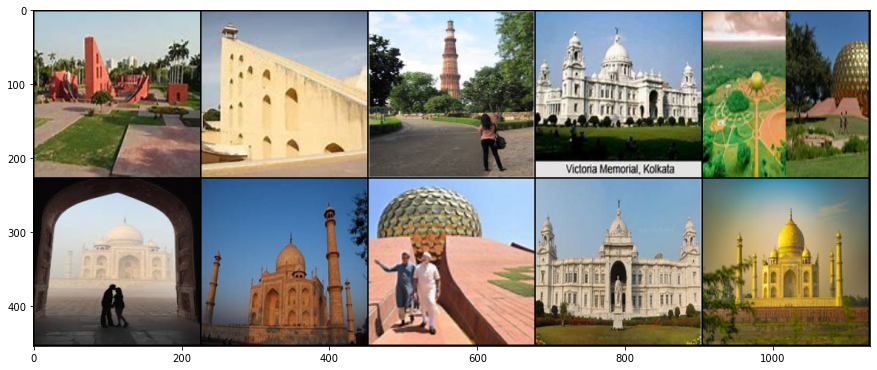

In [10]:
for images,labels in train_loader:
    break
class_names = [train_data.classes[i] for i in labels.numpy()]
print(class_names)
im_grid = make_grid(images,nrow=5)
plt.figure(figsize=(15,7))
plt.imshow(np.transpose(im_grid.numpy(),(1,2,0)))

['golden_temple', 'mysore_palace', 'golden_temple', 'hampi', 'chhatrapati_shivaji_terminus', 'golden_temple', 'kanchenjunga', 'victoria_memorial', 'jantar_mantar', 'charminar']


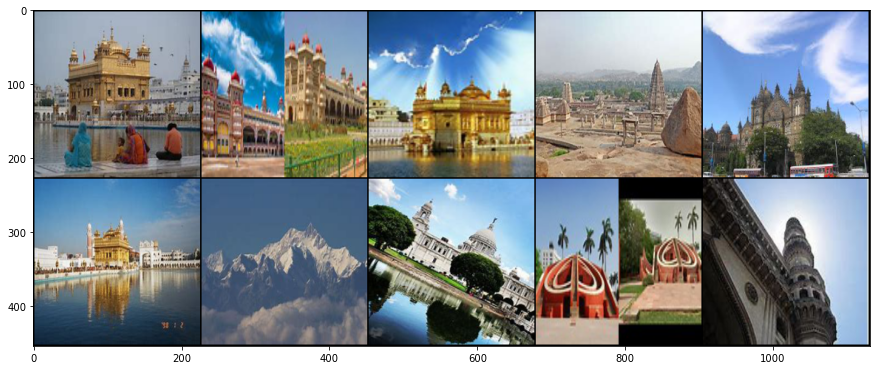

In [11]:
for images,labels in test_loader:
    break
class_names = [train_data.classes[i] for i in labels.numpy()]
print(class_names)
im_grid = make_grid(images,nrow=5)
plt.figure(figsize=(15,7))
plt.imshow(np.transpose(im_grid.numpy(),(1,2,0)))

# Preprocess

In [12]:
train_transform = transforms.Compose([
                transforms.Resize((224,224)),
                transforms.RandomHorizontalFlip(p=0.25),
                transforms.RandomRotation(15),
                transforms.ToTensor(),
                transforms.Normalize(
                    [0.485, 0.456, 0.406], # Recommended values for ImageNet trained models
                    [0.229, 0.224, 0.225])
                ])
test_transform = transforms.Compose([
                transforms.Resize((224,224)),
                transforms.ToTensor(),
                transforms.Normalize(
                    [0.485, 0.456, 0.406], # Recommended values for ImageNet trained models
                    [0.229, 0.224, 0.225])
                ])

In [13]:
train_data = datasets.ImageFolder(PATH_TRAIN, transform= train_transform)
test_data = datasets.ImageFolder(PATH_TEST, transform= test_transform)

In [14]:
train_loader = DataLoader(train_data,batch_size=10, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_data,batch_size=10, shuffle=True, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
['kanchenjunga', 'charminar', 'taj_mahal', 'dakshineshwar', 'wagah_border', 'jog_falls', 'hampi', 'mysore_palace', 'taj_mahal', 'charminar']


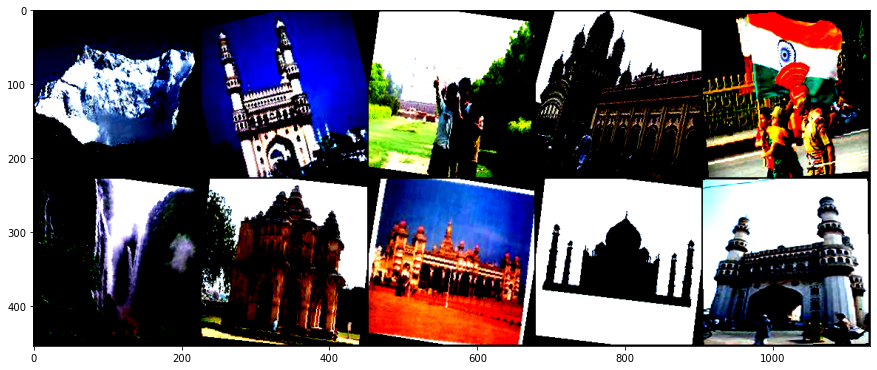

In [15]:
for images,labels in train_loader:
    break
class_names = [train_data.classes[i] for i in labels.numpy()]
print(class_names)
im_grid = make_grid(images,nrow=5)
plt.figure(figsize=(15,7))
plt.imshow(np.transpose(im_grid.numpy(),(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
['howrah_bridge', 'jantar_mantar', 'taj_mahal', 'buddhist_sanchi', 'qutub_minar', 'taj_mahal', 'humayun_tomb', 'chhatrapati_shivaji_terminus', 'mysore_palace', 'mysore_palace']


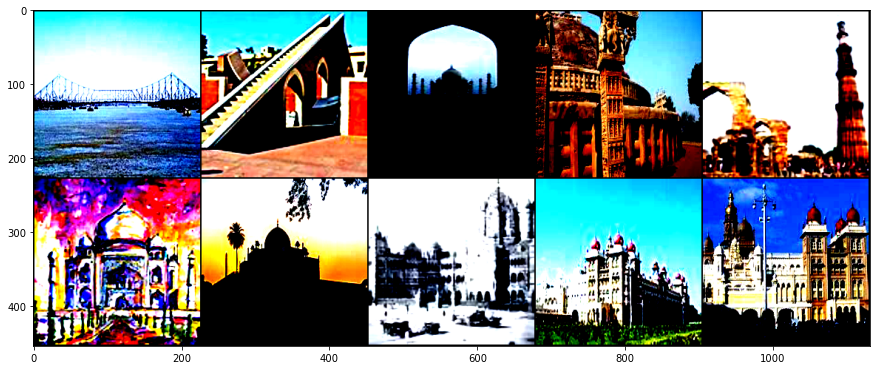

In [16]:
for images,labels in test_loader:
    break
class_names = [train_data.classes[i] for i in labels.numpy()]
print(class_names)
im_grid = make_grid(images,nrow=5)
plt.figure(figsize=(15,7))
plt.imshow(np.transpose(im_grid.numpy(),(1,2,0)))

# Create model

In [18]:
model = models.resnet34(pretrained=True)

In [19]:
# Freeze layers
for params in model.parameters():
    params.requires_grad = False

In [20]:
torch.manual_seed(7)

In [21]:
# Change the final fully-connected layer to match our number of classes
model.fc = nn.Linear(in_features=512, out_features=25, bias=True)

In [23]:
model = model.cuda()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Train

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

In [25]:
TRAIN_BATCH_SIZE = 128
TEST_BATCH_SIZE = 128

In [26]:
train_loader = DataLoader(train_data,batch_size=TRAIN_BATCH_SIZE, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_data,batch_size=TEST_BATCH_SIZE, shuffle=True, pin_memory=True)

In [27]:
import time
start_time = time.time()

epochs = 50

max_trn_batch = 1
max_tst_batch = 1

train_losses = []
test_losses = []
train_correct = []
test_correct = []

train_total_batches = int(len(train_data) / train_loader.batch_size + 0.5)
test_total_batches = int(len(test_data) / test_loader.batch_size + 0.5)

for i in range(epochs):
    print(f'\n\n************ START OF EPOCH {i} *************')
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        # if b == max_trn_batch:
        #     break
        b+=1
        
        # Apply the model
        X_train = X_train.cuda()
        y_train  = y_train.cuda()

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%(train_total_batches//10) == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{train_loader.batch_size*b:6}/{len(train_data)}]  train_loss: {loss.item():10.8f} train_accuracy: {trn_corr.item()*100/(train_loader.batch_size*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # if b == max_tst_batch:
            #     break

            # Apply the model
            X_test = X_test.cuda()
            y_test = y_test.cuda()

            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    y_test = y_test.cuda()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

    print(f'\n************ EPOCH {i} STATISTICS *************')
    print(f'Epoch {i} stats: train_loss: {train_losses[-1]:10.8f}   test_loss: {test_losses[-1]:10.8f}    train_accuracy:{train_correct[-1].item()*100/len(train_data):7.3f}%    test_accuracy:{test_correct[-1].item()*100/len(test_data):7.3f}%')
    print(f'************ END OF EPOCH {i} *************')
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

56/2629]  train_loss: 0.08561836 train_accuracy:  98.047%
epoch: 32  batch:    4 [   512/2629]  train_loss: 0.12828179 train_accuracy:  96.875%
epoch: 32  batch:    6 [   768/2629]  train_loss: 0.10048254 train_accuracy:  96.745%
epoch: 32  batch:    8 [  1024/2629]  train_loss: 0.12982631 train_accuracy:  96.973%
epoch: 32  batch:   10 [  1280/2629]  train_loss: 0.11030240 train_accuracy:  96.875%
epoch: 32  batch:   12 [  1536/2629]  train_loss: 0.14793947 train_accuracy:  96.940%
epoch: 32  batch:   14 [  1792/2629]  train_loss: 0.10364047 train_accuracy:  96.987%
epoch: 32  batch:   16 [  2048/2629]  train_loss: 0.10780565 train_accuracy:  97.070%
epoch: 32  batch:   18 [  2304/2629]  train_loss: 0.13064270 train_accuracy:  96.875%
epoch: 32  batch:   20 [  2560/2629]  train_loss: 0.15487708 train_accuracy:  96.797%

************ EPOCH 32 STATISTICS *************
Epoch 32 stats: train_loss: 0.08981365   test_loss: 0.32420129    train_accuracy: 96.843%    test_accuracy: 87.328%
****

In [28]:
torch.save(model,"./deploy/resnet34_bs-128_lr-3e3_ep-50.pt")

# Analyze

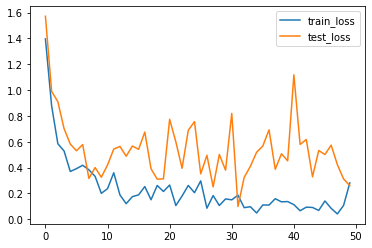

In [29]:
plt.plot(train_losses,label="train_loss")
plt.plot(test_losses, label="test_loss")
plt.legend()

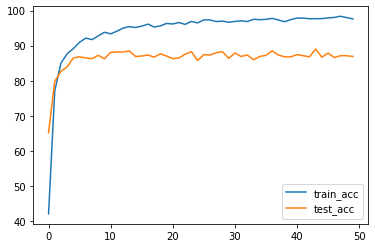

In [30]:
plt.plot([i.item()/len(train_data)*100 for i in train_correct],label="train_acc")
plt.plot([i.item()/len(test_data)*100 for i in test_correct],label="test_acc")
plt.legend()

# Test and Metrices

## Imports

In [1]:
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torchvision import datasets, transforms

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import numpy as np
import pandas as pd
import seaborn as sns

## Constants

In [2]:
PATH_DATA = "./data"
PATH_TEST = os.path.join(PATH_DATA,"test")
PATH_MODEL = "./deploy/resnet34_bs-128_lr-3e3_ep-50.pt"

TEST_BATCH_SIZE = 128

## Model and Data loading

In [3]:
# Load the model
model = torch.load(PATH_MODEL)

In [4]:
test_transform = transforms.Compose([
                transforms.Resize((224,224)),
                transforms.ToTensor(),
                transforms.Normalize(
                    [0.485, 0.456, 0.406], # Recommended values for ImageNet trained models
                    [0.229, 0.224, 0.225])
                ])

test_data = datasets.ImageFolder(PATH_TEST, transform= test_transform)
class_names = test_data.classes

## Get predictions for all test data

In [5]:
y_true = []
y_pred = []
y_proba = []

model = model.cpu()
model.eval()

for X_test, y_test in test_data:
    X_test = X_test.unsqueeze(0)
    with torch.no_grad():
        proba = nn.functional.softmax(model(X_test)).numpy().flatten()
    
    y_true.append(y_test)
    y_pred.append(np.argmax(proba))
    y_proba.append(proba)

In [6]:
df1 = pd.DataFrame({"y_true":y_true,"y_pred":y_pred})
df2 = pd.DataFrame(y_proba,columns=test_data.classes)
df = df1.join(df2)
df.head(10)

y_true  y_pred  auroville  buddhist_sanchi     charminar  \
0       0       0   0.999993     3.224104e-08  7.174027e-12   
1       0       0   0.998342     2.415589e-05  3.660811e-09   
2       0       0   0.891814     1.938624e-04  2.469926e-09   
3       0       7   0.002652     1.385493e-04  1.260029e-03   
4       0       0   0.999836     1.413376e-04  3.769439e-10   
5       0       7   0.069152     2.234631e-02  2.797891e-06   
6       0       0   0.986663     5.958128e-04  9.695306e-07   
7       0       0   0.999896     2.123831e-06  3.179494e-08   
8       0       0   0.999985     8.536889e-06  9.082792e-10   
9       0       0   0.839655     5.846276e-04  1.769897e-06   

   chhatrapati_shivaji_terminus  dakshineshwar  gateway_of_india  \
0                  4.260247e-10   1.824821e-10      7.369064e-11   
1                  2.197751e-09   3.079759e-07      3.894956e-07   
2                  2.431809e-05   2.756642e-05      7.879636e-08   
3                  3.963170e-06   5.687322e-03      1.190236e-02   
4                  3.326077e-09   5.012109e-06      1.767258e-09   
5                  7.878182e-05   2.945271e-05      1.676116e-05   
6                  6.568317e-05   1.694460e-05      5.817752e-05   
7                  8.041696e-07   4.070420e-07      3.591990e-08   
8                  7.027583e-07   2.115967e-07      1.279509e-07   
9                  6.367326e-06   1.965499e-05      1.474580e-02   

   golden_temple         hampi  ...  kanchenjunga  lotus_temple  \
0   1.720637e-12  4.386374e-08  ...  1.366748e-11      0.000007   
1   5.335114e-08  2.385673e-09  ...  2.786186e-11      0.000092   
2   3.146318e-08  3.649748e-06  ...  4.647487e-10      0.016674   
3   1.060234e-01  6.732987e-01  ...  4.920687e-06      0.007290   
4   3.023298e-08  2.597664e-07  ...  3.781004e-10      0.000007   
5   6.649835e-07  8.745897e-01  ...  1.278491e-06      0.004959   
6   1.445667e-03  2.275441e-04  ...  1.607554e-06      0.000396   
7   4.575254e-10  2.805050e-05  ...  5.367965e-09      0.000038   
8   7.934582e-10  3.408319e-08  ...  1.631502e-10      0.000002   
9   8.771859e-09  1.216353e-01  ...  1.829256e-08      0.000135   

   meenakshi_temple  mysore_palace   qutub_minar      red_fort    sun_temple  \
0      7.043671e-09   9.697475e-10  9.322663e-10  4.351811e-10  2.874094e-11   
1      2.047105e-08   1.941800e-09  2.778718e-08  7.227079e-07  2.156098e-09   
2      4.341431e-06   2.442196e-07  3.297639e-05  2.217865e-05  1.628422e-06   
3      2.657264e-03   6.604701e-03  4.633672e-02  9.372503e-03  9.693835e-04   
4      4.191599e-09   5.289342e-11  2.360046e-06  3.631546e-07  6.090185e-09   
5      2.516586e-04   1.330842e-03  3.052283e-03  2.308330e-03  3.042045e-04   
6      2.090674e-04   1.482644e-03  2.217291e-04  5.337792e-04  3.593197e-05   
7      4.930159e-06   1.532168e-06  1.557389e-07  6.773273e-07  3.524000e-08   
8      2.255470e-08   6.209919e-10  5.604978e-09  1.356165e-07  6.725422e-09   
9      3.439253e-04   2.272979e-04  1.627786e-03  3.349295e-04  3.508301e-04   

      taj_mahal  victoria_memorial  wagah_border  
0  4.802029e-09       4.372610e-11  5.497570e-12  
1  4.868837e-04       2.263465e-07  7.340244e-07  
2  7.014757e-02       5.577406e-04  5.382169e-10  
3  1.469164e-02       2.095700e-02  3.800255e-03  
4  2.370123e-06       1.410585e-07  1.167657e-08  
5  2.823293e-03       9.201261e-04  3.360095e-05  
6  1.812111e-03       2.234980e-04  2.366372e-03  
7  5.095962e-06       2.943106e-07  1.972582e-08  
8  1.078858e-06       4.929192e-07  1.136999e-10  
9  7.751079e-06       2.116296e-05  2.930634e-06  

[10 rows x 27 columns]

## Calculate all metrices

In [7]:
acc_score = accuracy_score(y_true,y_pred)
conf_mat = confusion_matrix(y_true,y_pred)
clf_report = classification_report(y_true,y_pred, target_names=class_names, output_dict=True)

# Create a DataFrame for easy printing and visualization
# Transposed to have row names as labels
df_clf_report = pd.DataFrame(clf_report).T

In [8]:
print("Overall accuracy: ",acc_score)

Overall accuracy:  0.8944033790918691


Overall accuracy looks good! My target as per Capstone proposal was to reach ~ 80% :)

In [9]:
# Pretty print confusion matrix, courtesy https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

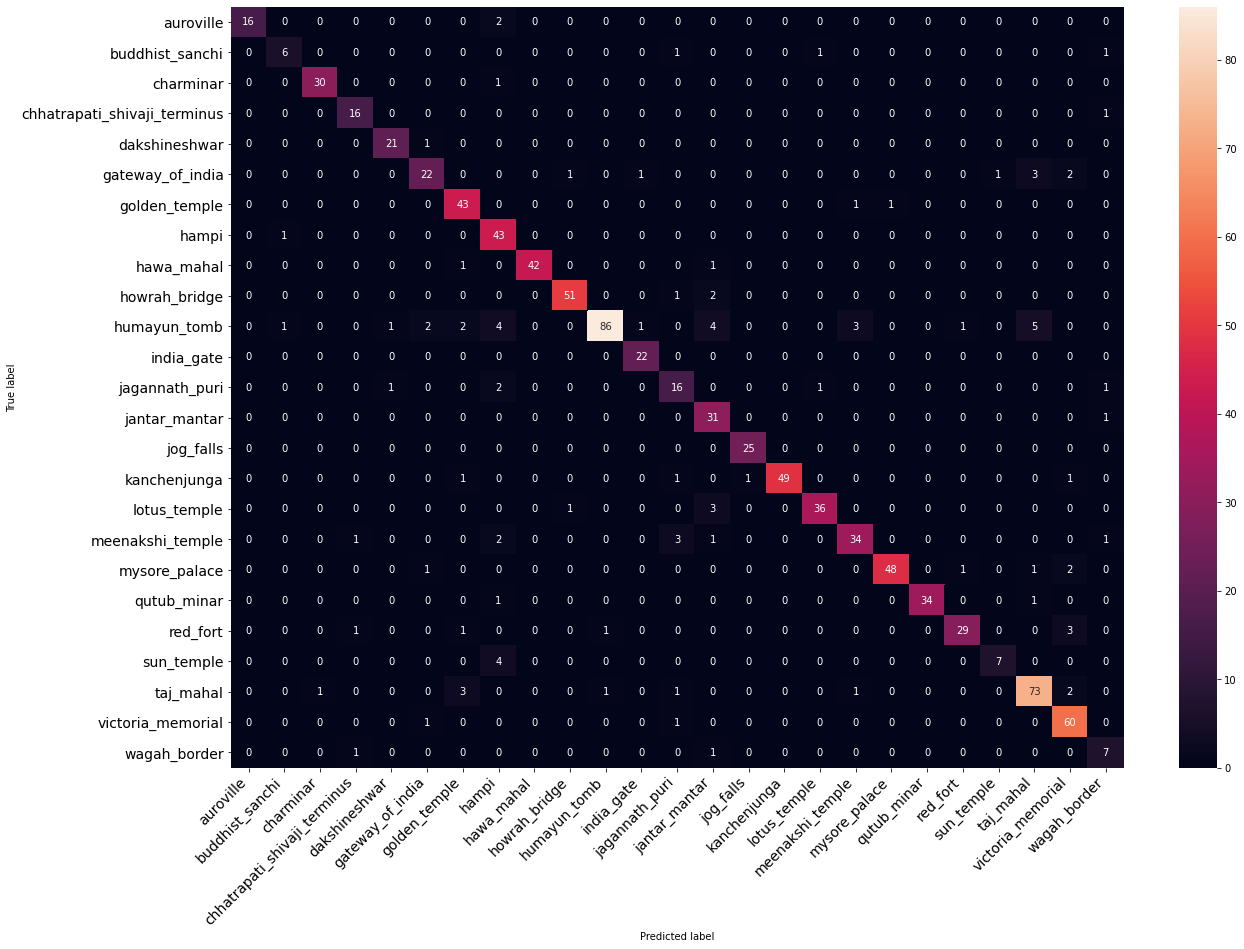

In [10]:
print_confusion_matrix(conf_mat,class_names,figsize = (20,14));

In [11]:
print("CLASSIFICATION REPORT:")
print(df_clf_report)

CLASSIFICATION REPORT:
                              precision    recall  f1-score     support
auroville                      1.000000  0.888889  0.941176   18.000000
buddhist_sanchi                0.750000  0.666667  0.705882    9.000000
charminar                      0.967742  0.967742  0.967742   31.000000
chhatrapati_shivaji_terminus   0.842105  0.941176  0.888889   17.000000
dakshineshwar                  0.913043  0.954545  0.933333   22.000000
gateway_of_india               0.814815  0.733333  0.771930   30.000000
golden_temple                  0.843137  0.955556  0.895833   45.000000
hampi                          0.728814  0.977273  0.834951   44.000000
hawa_mahal                     1.000000  0.954545  0.976744   44.000000
howrah_bridge                  0.962264  0.944444  0.953271   54.000000
humayun_tomb                   0.977273  0.781818  0.868687  110.000000
india_gate                     0.916667  1.000000  0.956522   22.000000
jagannath_puri                 0.666667  

CLASSIFICATION REPORT HEATMAP


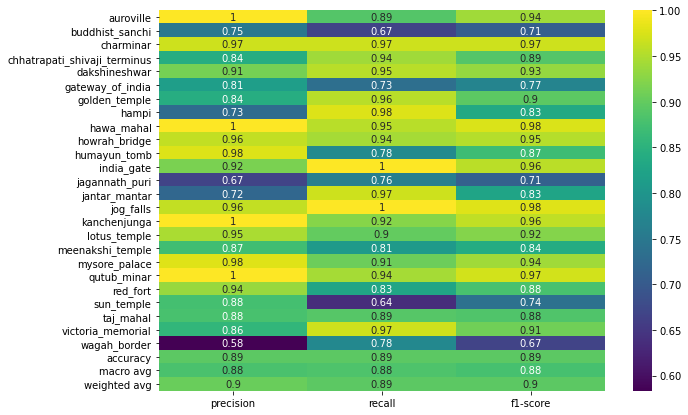

In [12]:
print("CLASSIFICATION REPORT HEATMAP")
plt.figure(figsize=(10,7))
# Exclude the "support" column since it is not normalized and will sway the colormap 
sns.heatmap(df_clf_report.iloc[:, :-1],annot=True,cmap="viridis");

## My interpretations of above results

The 5 worst performing classes in terms of F1-Score are:
* Wagah Border - 9 images
* Jagannath Puri - 21 images
* Buddhist Sanchi - 9 images
* Sun Temple - 11 images
* Gateway of India - 30 images
On an average, these classes have been tested on lesser data and their training folders also did not contain more images as compared to others. I hope that with more data, we can improve on the metrics.

## Find thresholds

For each class, when the true label is for that class, find the mean and standard deviation of predicted probabilites. Assume that the threshold is 1 standard deviation below the mean. Such that even if the predicted probability is maximum for a class, it must also be greater than the corresponding threshold to have the confidence of predicting that class. This would hopefully help determine outliers.

First, change the labels so that they look like proper nouns!

In [13]:
class_labels = [label.title().replace("_"," ") for label in test_data.classes]
# Check how it looks!
for i in range(len(class_labels)):
    print(test_data.classes[i],"--->", class_labels[i])

auroville ---> Auroville
buddhist_sanchi ---> Buddhist Sanchi
charminar ---> Charminar
chhatrapati_shivaji_terminus ---> Chhatrapati Shivaji Terminus
dakshineshwar ---> Dakshineshwar
gateway_of_india ---> Gateway Of India
golden_temple ---> Golden Temple
hampi ---> Hampi
hawa_mahal ---> Hawa Mahal
howrah_bridge ---> Howrah Bridge
humayun_tomb ---> Humayun Tomb
india_gate ---> India Gate
jagannath_puri ---> Jagannath Puri
jantar_mantar ---> Jantar Mantar
jog_falls ---> Jog Falls
kanchenjunga ---> Kanchenjunga
lotus_temple ---> Lotus Temple
meenakshi_temple ---> Meenakshi Temple
mysore_palace ---> Mysore Palace
qutub_minar ---> Qutub Minar
red_fort ---> Red Fort
sun_temple ---> Sun Temple
taj_mahal ---> Taj Mahal
victoria_memorial ---> Victoria Memorial
wagah_border ---> Wagah Border


In [14]:
thresholds = dict()
for class_id, class_label in enumerate(test_data.classes):
    proba_mean_present = df[df["y_true"]==class_id][class_label].mean()
    proba_std_present = df[df["y_true"]!=class_id][class_label].std()

    thresh = proba_mean_present - 1 * proba_std_present
    
    print(f"Prediction probability for {class_labels[class_id]}:\n\t Mean-{proba_mean_present:.2%}, STD-{proba_std_present:.2%}, Estimated Threshold-{thresh:.2%}\n")
    thresholds.update({class_labels[class_id]:thresh})

Prediction probability for Auroville:
	 Mean-87.47%, STD-0.40%, Estimated Threshold-87.08%

Prediction probability for Buddhist Sanchi:
	 Mean-55.19%, STD-3.87%, Estimated Threshold-51.32%

Prediction probability for Charminar:
	 Mean-95.26%, STD-3.17%, Estimated Threshold-92.09%

Prediction probability for Chhatrapati Shivaji Terminus:
	 Mean-76.87%, STD-2.82%, Estimated Threshold-74.04%

Prediction probability for Dakshineshwar:
	 Mean-87.72%, STD-3.65%, Estimated Threshold-84.08%

Prediction probability for Gateway Of India:
	 Mean-68.51%, STD-4.23%, Estimated Threshold-64.27%

Prediction probability for Golden Temple:
	 Mean-92.50%, STD-6.91%, Estimated Threshold-85.59%

Prediction probability for Hampi:
	 Mean-91.33%, STD-9.26%, Estimated Threshold-82.08%

Prediction probability for Hawa Mahal:
	 Mean-93.80%, STD-1.35%, Estimated Threshold-92.45%

Prediction probability for Howrah Bridge:
	 Mean-94.31%, STD-4.15%, Estimated Threshold-90.16%

Prediction probability for Humayun Tomb

In [15]:
json.dump(thresholds,open("./deploy/thresholds.json","w"))

# Inference Code

Here, I experiment to find the bare minimum code required to load my trained model and then make a prediction, given an image path or URL. This code is then packed into convenient functions. The idea is to allow others access to my model and make inference. Once tested, this function can further be served as a REST API so that other services like a font end can consumet it.

## Imports for inference

In [1]:
import os
import PIL
import io
import requests
import torch
from torchvision import transforms

## Inference function

In [2]:
# Reads an image from img_path into a PIL.Image
# img_path: Can be a URL or a local file path
def img_path_to_data(img_path):
    # Check if the path is an image URL or local file
    if "http" in img_path or "ftp" in img_path or "www" in img_path:
        response = requests.get(img_path)
        img_data = PIL.Image.open(io.BytesIO(response.content))
    else:
        img_data = PIL.Image.open(img_path)
    
    # Convert to RGB for images with 4 layers like PNGs
    return img_data.convert("RGB")

In [3]:
# img_data: PIL.Image format image
# model: torch.model
# Returns a tuple of the class_id [0,24] with maximum probability and a torch.tensor of probabilities of all class_id's
def predict_on_img_data(img_data, model):
    test_transform = transforms.Compose([
                transforms.Resize((224,224)),
                transforms.ToTensor(),
                transforms.Normalize(
                    [0.485, 0.456, 0.406],  # Recommended values for ImageNet trained models
                    [0.229, 0.224, 0.225])
                ])
        
    img_tensor = test_transform(img_data).unsqueeze(0)
    model.eval()
    with torch.no_grad():
        proba = torch.nn.functional.softmax(model(img_tensor)).flatten()
    class_id = torch.argmax(proba).item()
    return (class_id,proba)

## Test the inference function

In [4]:
PATH_MODEL = "./deploy/resnet34_bs-128_lr-3e3_ep-50.pt"
PATH_TEST_IMG = "./data/test/howrah_bridge/OIP - 2020-10-09T203559.731.jpg"
URL_TEST_IMG =  "https://www.gia.edu/images/FA19-Dirlam-Fig01-246456-468px.jpg"
CLASS_LABELS =  ['Auroville', 'Buddhist Sanchi', 'Charminar', 'Chhatrapati Shivaji Terminus', 'Dakshineshwar', 'Gateway Of India', 'Golden Temple', 'Hampi', 'Hawa Mahal', 'Howrah Bridge', 'Humayun Tomb', 'India Gate', 'Jagannath Puri', 'Jantar Mantar', 'Jog Falls', 'Kanchenjunga', 'Lotus Temple', 'Meenakshi Temple', 'Mysore Palace', 'Qutub Minar', 'Red Fort', 'Sun Temple', 'Taj Mahal', 'Victoria Memorial', 'Wagah Border'] 

In [5]:
model = torch.load(PATH_MODEL).cpu()

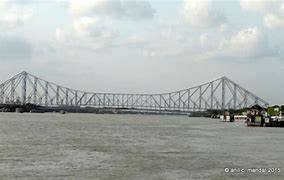

In [6]:
test_img = img_path_to_data(PATH_TEST_IMG)
test_img

In [7]:
class_id, preds = predict_on_img_data(test_img, model)
print(CLASS_LABELS[class_id], class_id)

Howrah Bridge 9


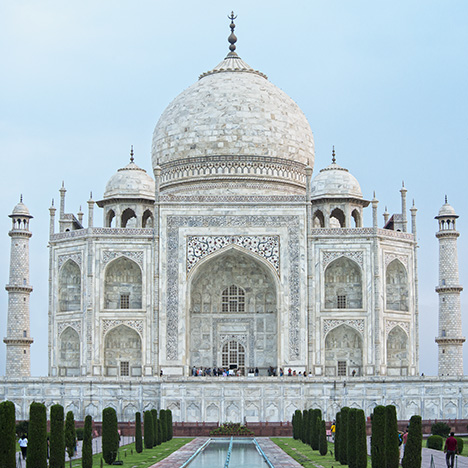

In [8]:
test_img = img_path_to_data(URL_TEST_IMG)
test_img

In [9]:
class_id, preds = predict_on_img_data(test_img, model)
print(CLASS_LABELS[class_id], class_id)

Taj Mahal 22
